# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [427]:
# Load pickled data
import pickle
# Custom imports
import os
import random
import time
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from scipy import misc
from sklearn.utils import shuffle
# TODO: Fill this in based on where you saved the training and testing data
training_file = 'train.p'
validation_file= 'valid.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

print('X_train: {0}'.format(X_train.shape))
print('y_train: {0}'.format(y_train.shape))
print('X_valid: {0}'.format(X_valid.shape))
print('y_valid: {0}'.format(y_valid.shape))
print('X_test: {0}'.format(X_test.shape))
print('y_test: {0}'.format(y_test.shape))

X_train: (34799, 32, 32, 3)
y_train: (34799,)
X_valid: (4410, 32, 32, 3)
y_valid: (4410,)
X_test: (12630, 32, 32, 3)
y_test: (12630,)


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [428]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = '{0} x {1}'.format(X_train.shape[1], X_train.shape[2])

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = 32 x 32
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

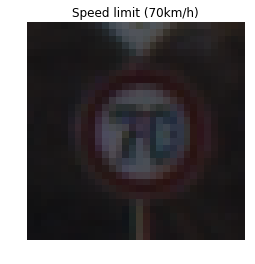

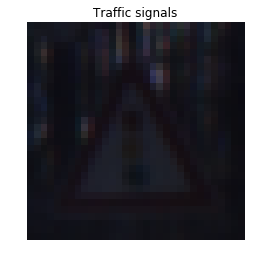

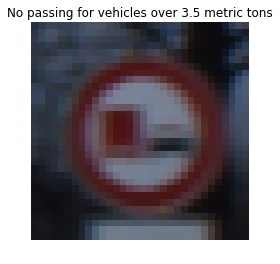

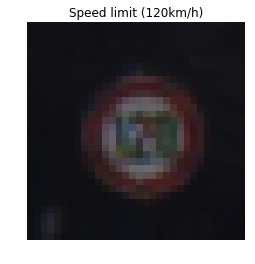

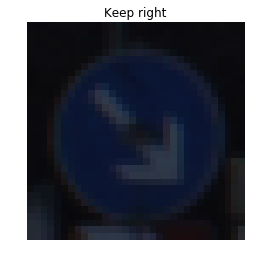

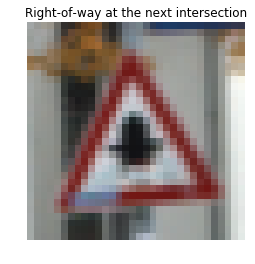

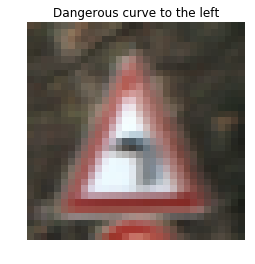

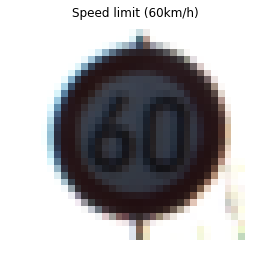

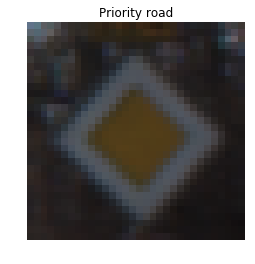

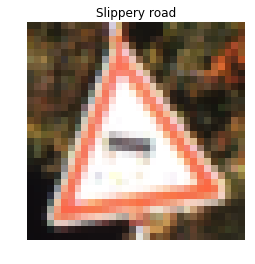

In [429]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
# Visualizations will be shown in the notebook.
%matplotlib inline

# Load traffic sign ids and labels in a Pandas dataframe
signnames = pd.read_csv('signnames.csv', header=0)
signnames.columns = ['id', 'label']
signnames = signnames.set_index('id')

# Show some saple images
random.seed(42)
for i in range(10):
    image_index = random.randint(1, n_train)
    sign_id = y_train[image_index]
    sign_label = signnames.loc[y_train[image_index]]['label']
    plt.imshow(X_train[image_index])
    plt.title(signnames.loc[sign_id]['label'])
    plt.axis('off')
    plt.show()

Id	Frequency		Label
2	2010		(Speed limit (50km/h))
1	1980		(Speed limit (30km/h))
13	1920		(Yield)
12	1890		(Priority road)
38	1860		(Keep right)
10	1800		(No passing for vehicles over 3.5 metric tons)
4	1770		(Speed limit (70km/h))
5	1650		(Speed limit (80km/h))
25	1350		(Road work)
9	1320		(No passing)
7	1290		(Speed limit (100km/h))
3	1260		(Speed limit (60km/h))
8	1260		(Speed limit (120km/h))
11	1170		(Right-of-way at the next intersection)
18	1080		(General caution)
35	1080		(Ahead only)
17	990		(No entry)
14	690		(Stop)
31	690		(Wild animals crossing)
33	599		(Turn right ahead)
15	540		(No vehicles)
26	540		(Traffic signals)
28	480		(Children crossing)
23	450		(Slippery road)
30	390		(Beware of ice/snow)
6	360		(End of speed limit (80km/h))
16	360		(Vehicles over 3.5 metric tons prohibited)
34	360		(Turn left ahead)
22	330		(Bumpy road)
36	330		(Go straight or right)
20	300		(Dangerous curve to the right)
40	300		(Roundabout mandatory)
21	270		(Double curve)
39	270		(Keep left)


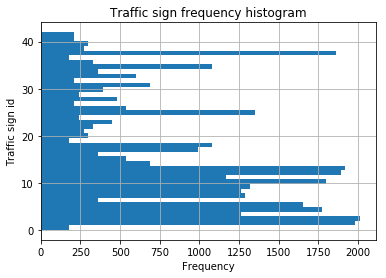

In [430]:
# Show Traffic Sign Frequencies
unique, counts = np.unique(y_train, return_counts=True)
sign_freq = dict(zip(unique, counts))
sign_freq = sorted(sign_freq.items(), key=lambda k: k[1], reverse=True)
print("Id\tFrequency\t\tLabel")
for sign_id, sign_label in sign_freq:
    print("{0}\t{1}\t\t({2})".format(sign_id, sign_label, signnames.loc[sign_id]['label']))
print("\n\n")

# Traffic sign frequency histogram
plt.hist(y_train, n_classes, orientation='horizontal')
plt.title('Traffic sign frequency histogram')
plt.xlabel('Frequency')
plt.ylabel('Traffic sign id')
plt.grid(True)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [431]:
### Preprocess the data here. Preprocessing steps could include normalization, converting to grayscale, etc.
### Feel free to use as many code cells as needed.

# Normalize images using MinMax normlization
def normalize(images):
    """
    Normalize a set of images using MinMax normalization 
    """
    _min = images.min(axis=(1, 2), keepdims=True)
    _max = images.max(axis=(1, 2), keepdims=True)
    return (images - _min) / (_max - _min)

# Convert an image from RGB to grayscale
def rgb_to_gray_image(rgb_image):
    """
    Convert an image from RGB to Grayscale
    """
    return cv2.cvtColor(rgb_image, cv2.COLOR_RGB2GRAY)
    
def rgb_to_gray_images(rgb_images):
    """
    Convert a set of images from RGB to Grayscale
    """
    images = []
    for rgb_image in rgb_images:
        images.append(rgb_to_gray_image(rgb_image))
    
    return np.array(images)

# Apply preprocessing to all images
def preprocess_image(image):
    """
    Apply all preprocessing to a single image
    """
    return normalize(rgb_to_gray_image(image))

def preprocess_images(images):
    """
    Apply all preprocessing to a set of images
    """
    return normalize(rgb_to_gray_images(images))

# Preprocess the training set
X_train_new = X_train
X_train_new = preprocess_images(X_train)
y_train_new = y_train

# Preprocess the validation set
X_valid_new = X_valid
X_valid_new = preprocess_images(X_valid)
y_valid_new = y_valid

# Preprocess the test set
X_test_new = X_test
X_test_new = preprocess_images(X_test)
y_test_new = y_test

print("X_train_new shape: {0}".format(X_train_new.shape))
print("y_train_new shape: {0}".format(y_train_new.shape))
print("X_valid_new shape: {0}".format(X_valid_new.shape))
print("y_valid_new shape: {0}".format(y_valid_new.shape))
print("X_test_new shape: {0}".format(X_test_new.shape))
print("y_test_new shape: {0}".format(y_test_new.shape))

X_train_new shape: (34799, 32, 32)
y_train_new shape: (34799,)
X_valid_new shape: (4410, 32, 32)
y_valid_new shape: (4410,)
X_test_new shape: (12630, 32, 32)
y_test_new shape: (12630,)


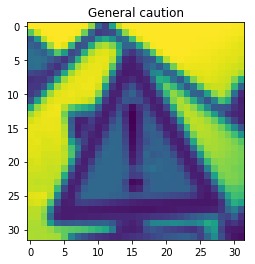

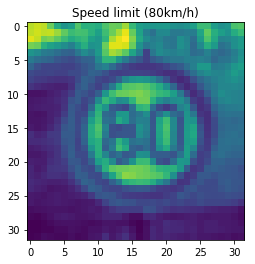

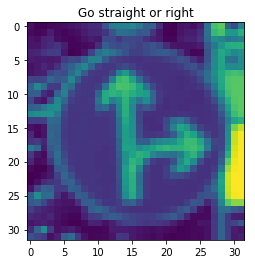

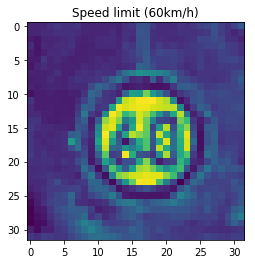

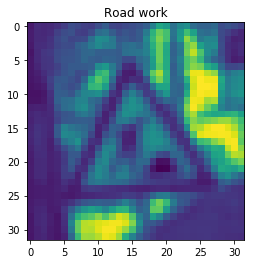

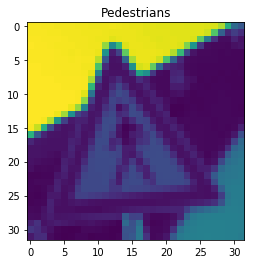

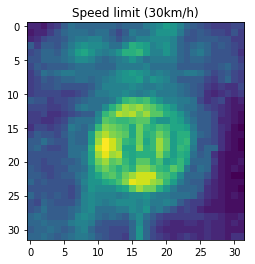

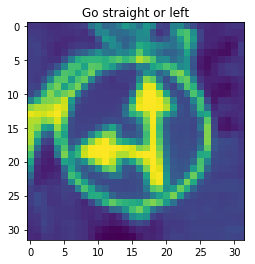

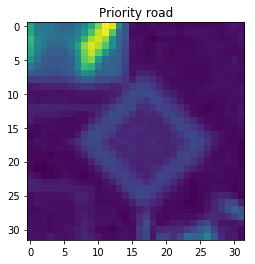

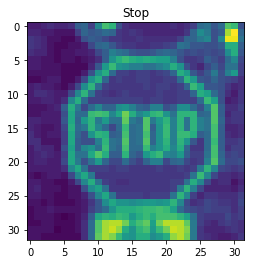

X_train shape: (34799, 32, 32, 1)
y_train shape: (34799,)
X_valid shape: (4410, 32, 32, 1)
y_valid shape: (4410,)
X_test shape: (12630, 32, 32, 1)
y_test shape: (12630,)


In [432]:
# Replace original trai, validation and test set with preprocessed sets
X_train = X_train_new
y_train = y_train_new
X_valid = X_valid_new
y_valid = y_valid_new
X_test = X_test_new
y_test = y_test_new

# Shuffle the training set
X_train, y_train = shuffle(X_train, y_train)

# Show some sample preprocessed images
random.seed(42)
for i in range(10):
    index = random.randint(1, n_train)
    plt.imshow(X_train[index])
    plt.title(signnames.loc[y_train[index]]['label'])
    plt.show()

# Reshape the training, validation and test set so to match the
# input shape required by the model
X_train = X_train.reshape(-1, 32, 32, 1)
X_valid = X_valid.reshape(-1, 32, 32, 1)
X_test = X_test.reshape(-1, 32, 32, 1)

print("X_train shape: {0}".format(X_train.shape))
print("y_train shape: {0}".format(y_train.shape))
print("X_valid shape: {0}".format(X_valid.shape))
print("y_valid shape: {0}".format(y_valid.shape))
print("X_test shape: {0}".format(X_test.shape))
print("y_test shape: {0}".format(y_test.shape))

### Model Architecture

In [433]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
def weight_variable(shape, mu=0, sigma=0.1):
    """
    Return a normally distributed TensorFlow weight variable
    """
    return tf.Variable(tf.truncated_normal(shape=shape, mean=mu, stddev=sigma))

def bias_variable(shape):
    """
    Return a TensorFlow bias variable
    """
    return tf.Variable(tf.constant(0.1, shape=shape))

def conv2d(x, W, strides, padding='VALID'):
    """
    Perform 2D convolution
    """
    return tf.nn.conv2d(x, W, strides, padding=padding)

def max_pool(x, ksize, strides, padding='VALID'):
    """
    Perform Max Pooling
    """
    return tf.nn.max_pool(x, ksize=ksize, strides=strides, padding=padding)

# Input layer: each image is 32 x 32 x 1 (Height x Width x Depth)
x = tf.placeholder(tf.float32, [None, 32, 32, 1], name='x')
y = tf.placeholder(tf.int32, [None], name='y')
# One-hot-encode the labels
y_one_hot = tf.one_hot(y, 43)
# Define keep probability tensor to use with dropout
keep_prob = tf.placeholder(tf.float32, name='keep_prob')

print('x: {0}'.format(x.get_shape()))
print('y: {0}'.format(y.get_shape()))
print('y_one_hot: {0}'.format(y_one_hot.get_shape()))

# Mean and standard deviation
mu = 0
sigma = 0.1

# First layer: convolution + max pooling
W_conv1 = weight_variable([3, 3, 1, 6], mu, sigma)
b_conv1 = bias_variable([6])
h_conv1 = tf.nn.relu(conv2d(x, W_conv1, strides=[1, 1, 1, 1]) + b_conv1)
# Remove Max Pooling
# h_pool1 = max_pool(h_conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1])
print('h_conv1: {0}'.format(h_conv1.get_shape()))
#print('h_pool1: {0}'.format(h_pool1.get_shape()))

# Second layer: convolution + max pooling
W_conv2 = weight_variable([5, 5, 6, 16], mu, sigma)
b_conv2 = bias_variable([16])
h_conv2 = tf.nn.relu(conv2d(h_conv1, W_conv2, strides=[1, 1, 1, 1]) + b_conv2)
# Remove Max Pooling
# h_pool2 = max_pool(h_conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1])
print('h_conv2: {0}'.format(h_conv2.get_shape()))
#print('h_pool2: {0}'.format(h_pool2.get_shape()))

# Third layer: convolution + max pooling
W_conv3 = weight_variable([5, 5, 16, 32], mu, sigma)
b_conv3 = bias_variable([32])
h_conv3 = tf.nn.relu(conv2d(h_conv2, W_conv3, strides=[1, 1, 1, 1]) + b_conv3)
h_pool3 = max_pool(h_conv3, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1])
print('h_conv3: {0}'.format(h_conv3.get_shape()))
print('h_pool3: {0}'.format(h_pool3.get_shape()))

# Flatten the Max Pooling layer output to feed the fully connected layer
h_pool3_flat = tf.reshape(h_pool3, [-1, 11 * 11 * 32])
print('h_pool2_flat: {0}'.format(h_pool2_flat.get_shape()))

# First fully connected layer
W_fc1 = weight_variable([11 * 11 * 32, 120])
b_fc1 = bias_variable([120])
h_fc1 = tf.nn.relu(tf.matmul(h_pool3_flat, W_fc1) + b_fc1)
print('h_fc1: {0}'.format(h_fc1.get_shape()))

# Dropout
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)
print('h_fc1_drop: {0}'.format(h_fc1_drop.get_shape()))

# Second fully connected layer
W_fc2 = weight_variable([120, 84])
b_fc2 = bias_variable([84])
h_fc2 = tf.nn.relu(tf.matmul(h_fc1_drop, W_fc2) + b_fc2)
print('h_fc2: {0}'.format(h_fc2.get_shape()))

# Output layer
W_out = weight_variable([84, 43])
b_out = bias_variable([43])
y_pred = tf.matmul(h_fc2, W_out) + b_out
print('y_pred: {0}'.format(y_pred.get_shape()))

x: (?, 32, 32, 1)
y: (?,)
y_one_hot: (?, 43)
h_conv1: (?, 30, 30, 6)
h_conv2: (?, 26, 26, 16)
h_conv3: (?, 22, 22, 32)
h_pool3: (?, 11, 11, 32)
h_pool2_flat: (?, 400)
h_fc1: (?, 120)
h_fc1_drop: (?, 120)
h_fc2: (?, 84)
y_pred: (?, 43)


### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [434]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

print("X_train shape: {0}".format(X_train.shape))
print("y_train shape: {0}".format(y_train.shape))
print("X_valid shape: {0}".format(X_valid.shape))
print("y_valid shape: {0}".format(y_valid.shape))
print("X_test shape: {0}".format(X_test.shape))
print("y_test shape: {0}".format(y_test.shape))

save_path = "./classifier.ckpt"
if not os.path.isabs(save_path):
    save_path = os.path.abspath(os.path.join(os.getcwd(), save_path))

print("Saving model to {}".format(save_path))
saver = tf.train.Saver()

# Hyperparameters
EPOCHS = 100
BATCH_SIZE = 160
LEARNING_RATE = 0.001

# Dropout keep probabilities to use while training the network
TRAIN_KEEP_PROB = 0.7
# Dropout keep probability must be 1.0 for validation and test set in such a way to use the full network capability
VALID_KEEP_PROB = 1.0
TEST_KEEP_PROB = 1.0

# Loss function to minimize
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_pred, labels=y_one_hot))
# Single trainign step operation
train_op = tf.train.AdamOptimizer(learning_rate=LEARNING_RATE).minimize(loss_op)
# Compute number of classes predicted correctly
correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.argmax(y_one_hot, 1))
# Compute accuracy of prediction
accuracy_op = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

def eval_data(features, labels):
    """
    Given a dataset as input returns the loss and accuracy.
    """
    num_examples = features.shape[0]
    total_acc, total_loss = 0, 0
    session = tf.get_default_session()
    for i in range(0, num_examples, BATCH_SIZE):
        
        batch_x, batch_y = features[i:i + BATCH_SIZE], labels[i:i + BATCH_SIZE]
        loss, acc = session.run([loss_op, accuracy_op],
                             feed_dict={
                                 x: batch_x,
                                 y: batch_y,
                                 keep_prob: VALID_KEEP_PROB
                             })
        total_acc += (acc * batch_x.shape[0])
        total_loss += (loss * batch_x.shape[0])
    return total_loss/num_examples, total_acc/num_examples

with tf.Session() as session:
    # Initialize variables
    session.run(tf.global_variables_initializer())
    num_examples = X_train.shape[0]
    print("Start training...")
    print()
    # Collect validation loss data into a list for later graph plot
    training_start_time = time.time()
    # Train the model
    for epoch in range(EPOCHS):
        epoch_start_time = time.time()
        for i in range(0, num_examples, BATCH_SIZE):
            batch_x, batch_y = X_train[i:i + BATCH_SIZE], y_train[i:i + BATCH_SIZE]
            _, loss = session.run([train_op, loss_op],
                               feed_dict={
                                   x: batch_x,
                                   y: batch_y,
                                   keep_prob: TRAIN_KEEP_PROB
                               })

        # Evaluate model on validation set
        val_loss, val_acc = eval_data(X_valid, y_valid)
        epoch_end_time= time.time()
        
        print("EPOCH {0}, time {1:.1f} sec".format(epoch + 1, epoch_end_time - epoch_start_time))
        print("Validation loss = {:.3f}".format(val_loss))
        print("Validation accuracy = {:.3f}".format(val_acc))
        print()
    
    training_end_time = time.time()
    print("Training time: {0:.1f} sec".format(training_end_time - training_start_time))
    print()
    
    # Save the model
    print("Model saved to {}".format(save_path))
    saver.save(session, save_path)

X_train shape: (34799, 32, 32, 1)
y_train shape: (34799,)
X_valid shape: (4410, 32, 32, 1)
y_valid shape: (4410,)
X_test shape: (12630, 32, 32, 1)
y_test shape: (12630,)
Saving model to C:\Users\Salvatore\Documents\Udacity_Self_Drivig_Cars\udacity_carnd\term1\CarND-Traffic-Sign-Classifier-Project\classifier.ckpt
Start training...

EPOCH 1, time 19.2 sec
Validation loss = 0.498
Validation accuracy = 0.845

EPOCH 2, time 18.0 sec
Validation loss = 0.284
Validation accuracy = 0.912

EPOCH 3, time 17.9 sec
Validation loss = 0.239
Validation accuracy = 0.928

EPOCH 4, time 18.0 sec
Validation loss = 0.205
Validation accuracy = 0.942

EPOCH 5, time 18.0 sec
Validation loss = 0.173
Validation accuracy = 0.952

EPOCH 6, time 18.0 sec
Validation loss = 0.166
Validation accuracy = 0.955

EPOCH 7, time 18.2 sec
Validation loss = 0.137
Validation accuracy = 0.966

EPOCH 8, time 18.2 sec
Validation loss = 0.163
Validation accuracy = 0.954

EPOCH 9, time 18.6 sec
Validation loss = 0.159
Validation a

In [435]:
# Evaluate the model on test set
with tf.Session() as session:
    saver.restore(session, save_path)
    # Evaluate model on test set
    test_start_time = time.time()
    test_loss, test_acc = eval_data(X_test, y_test)
    print("Test loss = {:.3f}".format(test_loss))
    print("Test accuracy = {:.3f}".format(test_acc))
    print()
    test_end_time = time.time()
    print("Test time: {0:.1f} sec".format(test_end_time - test_start_time))
    print()

Test loss = 0.257
Test accuracy = 0.967

Test time: 2.8 sec



---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

Original images


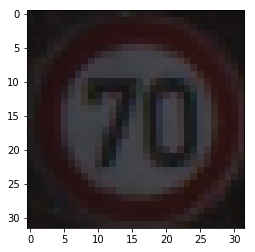

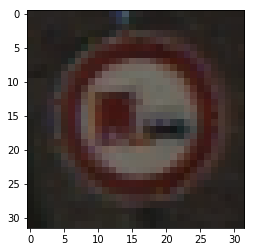

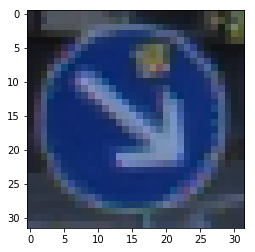

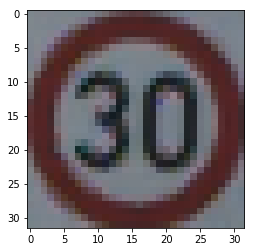

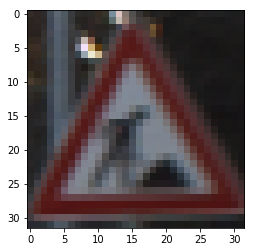

Preprocessed images


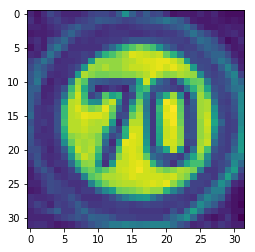

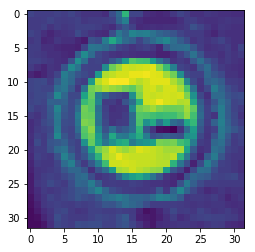

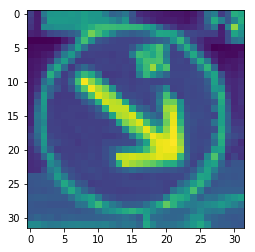

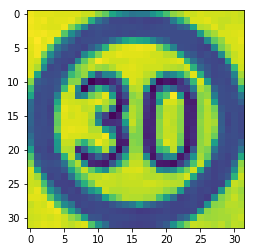

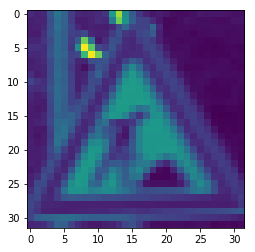

images shape: (5, 32, 32, 3)
gray_images shape: (5, 32, 32, 1)


In [436]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

# Load images to test the model 
test_images = os.listdir('test_images/')

# Load test images as numpy arrays
print("Original images")
images = []
for img in test_images:
    image_path = os.path.join('test_images', img)
    image = misc.imread(image_path)
    images.append(image)
    plt.imshow(image)
    plt.show()

# Apply preprocessing to test images
print("Preprocessed images")
gray_images = transform(images)
for gray_image in gray_images:
    plt.imshow(gray_image)
    plt.show()

images = np.array(images)
gray_images = np.array(gray_images).reshape(-1, 32, 32, 1)
print("images shape: {}".format(images.shape))
print("gray_images shape: {}".format(gray_images.shape))

### Predict the Sign Type for Each Image

In [437]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
with tf.Session() as session:
    saver.restore(session, save_path)
    # Use tf.nn.softmax on network output to compute probabilities
    probabilities = session.run(tf.nn.softmax(y_pred), feed_dict={x: gray_images, keep_prob : 1.0})
    sign_ids = session.run(tf.argmax(probabilities, axis=1))

print("Id\tLabel")
for sign_id in sign_ids:
    print("{0}\t{1}".format(sign_id, signnames.loc[sign_id]['label']))

Id	Label
4	Speed limit (70km/h)
10	No passing for vehicles over 3.5 metric tons
38	Keep right
1	Speed limit (30km/h)
25	Road work


### Analyze Performance

In [438]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

# Correct test image labels
correct_labels = [4, 10, 38, 1, 25]
with tf.Session() as session:
    saver.restore(session, save_path)
    comp_pred = session.run(correct_prediction, feed_dict={x: gray_images, y: correct_labels, keep_prob: 1.0})
    print("Accuracy: {0}%".format(sum(comp_pred==True) / comp_pred.shape[0] * 100))

Accuracy: 100.0%


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

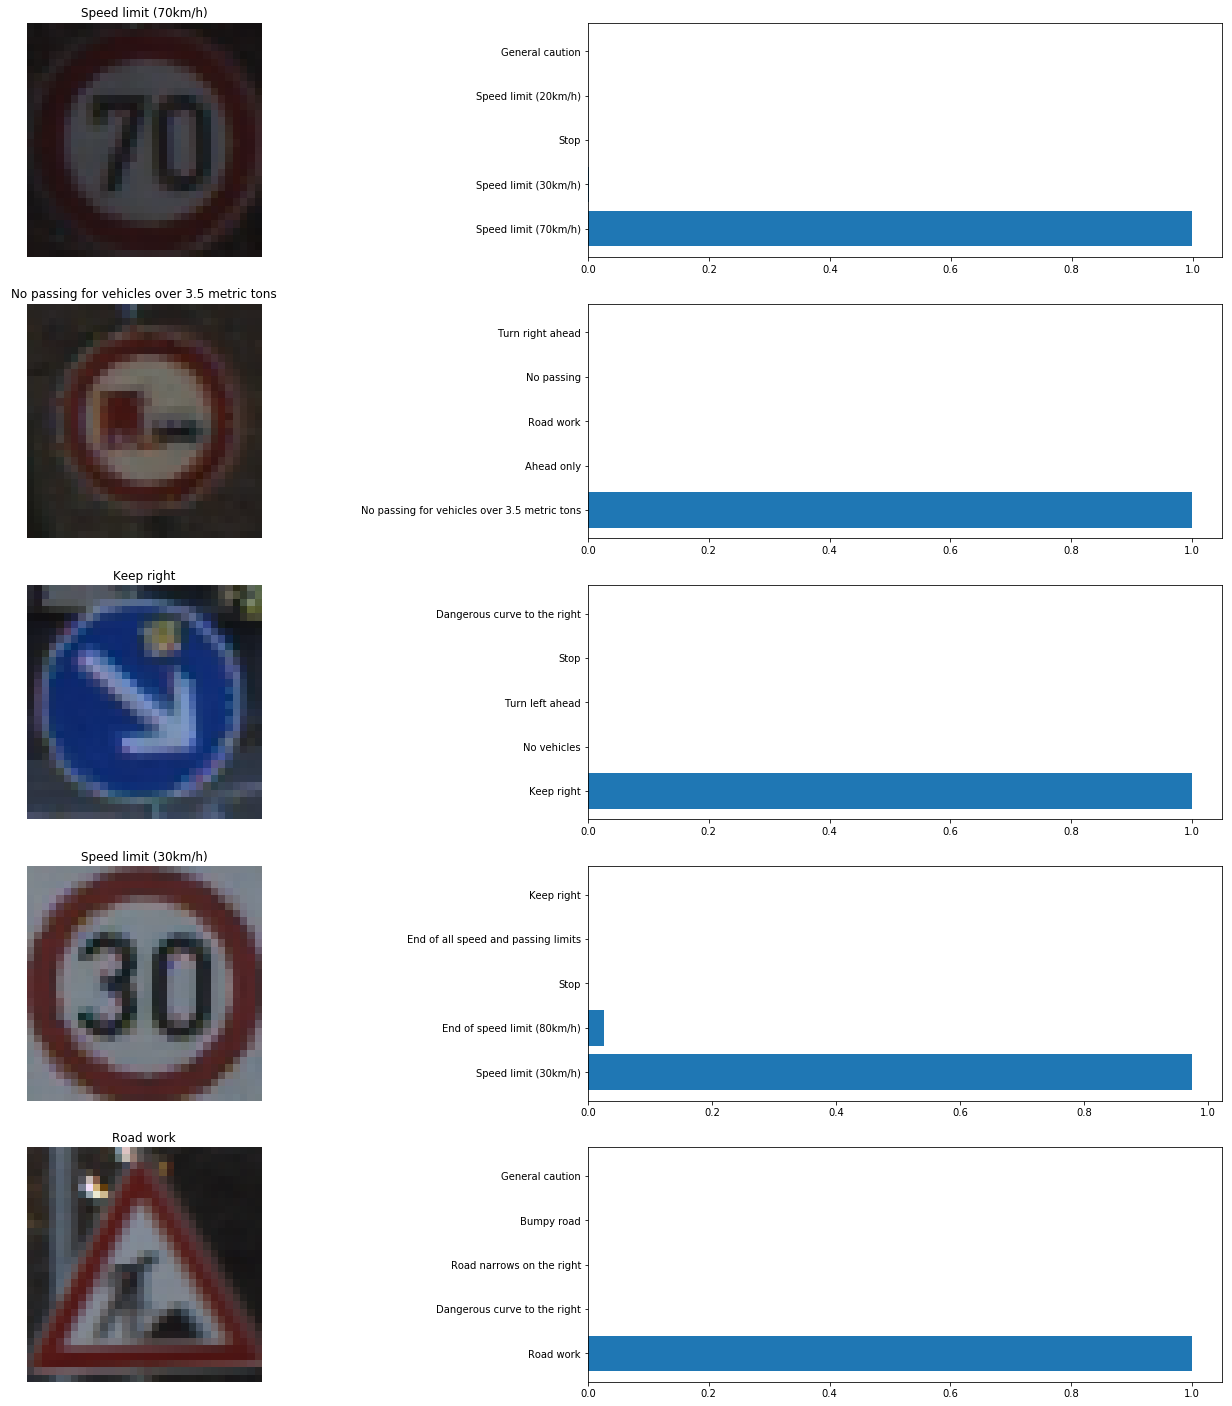

In [439]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
with tf.Session() as session:
    predicts = session.run(tf.nn.top_k(probabilities, k=5))

# Plot test images and corrsponding top 5 class probabilities
plt.figure(figsize=(25, 25))
for i in range(len(predicts[0])):
    plt.subplot(5, 2, 2*i+1)
    plt.imshow(images[i])
    plt.title(signnames.loc[predicts[1][i][0]]['label'])
    plt.axis('off')
    plt.subplot(5, 2, 2*i+2)
    plt.barh(np.arange(0, 5, 1), predicts[0][i])
    y_labels = [signnames.loc[i]['label'] for i in predicts[1][i]]
    plt.yticks(np.arange(0, 5, 1), y_labels)
plt.show()

---

## Step 4: Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


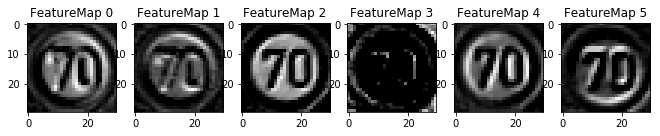

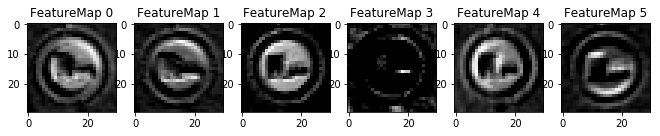

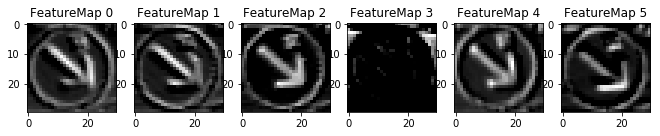

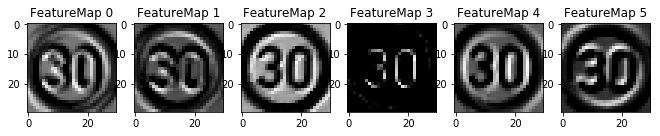

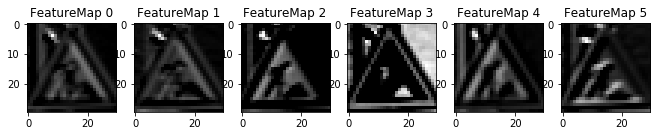

In [441]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.
with tf.Session() as session:
    saver.restore(session, save_path)
    # image_input: the test image being fed into the network to produce the feature maps
    # tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
    # activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
    # plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry
    def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
        # Here make sure to preprocess your image_input in a way your network expects
        # with size, normalization, ect if needed
        # image_input =
        # Note: x should be the same name as your network's tensorflow data placeholder variable
        # If you get an error tf_activation is not defined it maybe having trouble accessing the variable from inside a function
        activation = tf_activation.eval(session=session,feed_dict={x : image_input})
        featuremaps = activation.shape[3]
        plt.figure(plt_num, figsize=(15,15))
        for featuremap in range(featuremaps):
            plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
            plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
            if activation_min != -1 & activation_max != -1:
                plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
            elif activation_max != -1:
                plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
            elif activation_min !=-1:
                plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
            else:
                plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")
        
    # First convolutional layer feature maps
    for i in range(gray_images.shape[0]):
        outputFeatureMap([gray_images[i]], tf_activation=h_conv1, plt_num=10+i)
    
    # Second convolutional layer feature maps
    # for i in range(gray_images.shape[0]):
    #    outputFeatureMap([gray_images[i]], tf_activation=h_conv2, plt_num=100+i)
    
    # Third convolutional layer feature maps
    # for i in range(gray_images.shape[0]):
    #    outputFeatureMap([gray_images[i]], tf_activation=h_conv3, plt_num=1000+i)
    

### Question 9

Discuss how you used the visual output of your trained network's feature maps to show that it had learned to look for interesting characteristics in traffic sign images


**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 